In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import prettytable
import seaborn as sns
from tqdm import tqdm
import warnings
from sklearn import preprocessing


warnings.simplefilter(action="ignore")

Read data

In [3]:
all_cells = pd.read_parquet('../data/04_feature/n2/n2_concatenated_combined_functional_genomics_data.parquet')

MA0139.1
MA1929.1
MA1930.1

In [6]:
all_cells = all_cells[['chr', 'x', 'y', 'cell_type', 'label', 'x_MA0139.1_f', 'y_MA0139.1_f', 'x_MA0139.1_r', 'y_MA0139.1_r',
'x_MA1929.1_f', 'y_MA1929.1_f', 'x_MA1929.1_r', 'y_MA1929.1_r',
'x_MA1930.1_f', 'y_MA1930.1_f', 'x_MA1930.1_r', 'y_MA1930.1_r']]
all_cells

,chr,x,y,cell_type,label,x_MA0139.1_f,y_MA0139.1_f,x_MA0139.1_r,y_MA0139.1_r,x_MA1929.1_f,y_MA1929.1_f,x_MA1929.1_r,y_MA1929.1_r,x_MA1930.1_f,y_MA1930.1_f,x_MA1930.1_r,y_MA1930.1_r
0,1,845000,895000,IMR90,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,845000,65292500,IMR90,0,0,1,0,1,1,1,0,0,0,1,0,0
4,1,845000,214562500,IMR90,0,0,0,0,1,1,0,0,0,0,0,0,0
17,1,845000,12612500,IMR90,0,0,0,0,0,1,0,0,1,0,0,0,1
20,1,845000,240775000,IMR90,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,X,154187500,154412500,NHEK,1,0,0,0,0,0,0,0,0,0,0,0,0
56687,X,154205000,154375000,GM12878,1,0,0,0,0,0,0,0,0,0,0,0,0
30911,X,154205000,154315000,HMEC,1,0,0,0,0,0,0,0,0,0,0,0,0
14701,X,154207500,154287500,GM12878,1,1,1,0,0,1,0,0,0,0,2,0,0


In [9]:
all_cells[((all_cells['x_MA0139.1_f']>0)|(all_cells['x_MA1929.1_f']>0)|(all_cells['x_MA1930.1_f']>0))&((all_cells['y_MA0139.1_r']>0)|(all_cells['y_MA1929.1_r']>0)|(all_cells['y_MA1930.1_r']>0))&(all_cells['label']==1)]

,chr,x,y,cell_type,label,x_MA0139.1_f,y_MA0139.1_f,x_MA0139.1_r,y_MA0139.1_r,x_MA1929.1_f,y_MA1929.1_f,x_MA1929.1_r,y_MA1929.1_r,x_MA1930.1_f,y_MA1930.1_f,x_MA1930.1_r,y_MA1930.1_r
18,1,1712500,1837500,GM12878,1,0,2,1,1,0,2,0,0,1,1,1,0
94,1,1715000,1835000,K562,1,0,0,0,0,2,0,0,0,2,0,0,1
176,1,2125000,2325000,HMEC,1,2,0,1,0,1,1,2,1,0,0,1,0
63,1,2132500,2517500,GM12878,1,0,1,0,0,0,1,1,1,1,0,0,0
235,1,2132500,2317500,K562,1,1,0,1,2,0,1,1,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,X,122965000,123095000,K562,1,2,0,0,2,1,0,0,0,1,0,0,2
30684,X,128735000,129195000,IMR90,1,1,1,0,1,1,1,0,2,2,2,0,0
16193,X,128735000,129195000,K562,1,1,1,0,0,1,1,0,1,1,3,0,0
30687,X,149942500,150252500,IMR90,1,1,1,0,0,1,0,0,1,2,0,0,0


In [10]:
all_cells[all_cells['label']==1]

,chr,x,y,cell_type,label,x_MA0139.1_f,y_MA0139.1_f,x_MA0139.1_r,y_MA0139.1_r,x_MA1929.1_f,y_MA1929.1_f,x_MA1929.1_r,y_MA1929.1_r,x_MA1930.1_f,y_MA1930.1_f,x_MA1930.1_r,y_MA1930.1_r
0,1,845000,895000,IMR90,1,0,0,0,0,1,0,0,0,0,0,0,0
0,1,935000,995000,HMEC,1,0,0,0,0,0,0,0,0,0,0,0,0
14707,1,1055000,1185000,GM12878,1,0,0,0,0,0,0,0,0,0,0,0,0
30693,1,1055000,1235000,IMR90,1,0,0,0,0,0,0,0,0,0,0,0,0
0,1,1582500,1647500,K562,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,X,154187500,154412500,NHEK,1,0,0,0,0,0,0,0,0,0,0,0,0
56687,X,154205000,154375000,GM12878,1,0,0,0,0,0,0,0,0,0,0,0,0
30911,X,154205000,154315000,HMEC,1,0,0,0,0,0,0,0,0,0,0,0,0
14701,X,154207500,154287500,GM12878,1,1,1,0,0,1,0,0,0,0,2,0,0


Text(0.5, 1.0, 'x CTCF ChIP-seq bigWig mean')

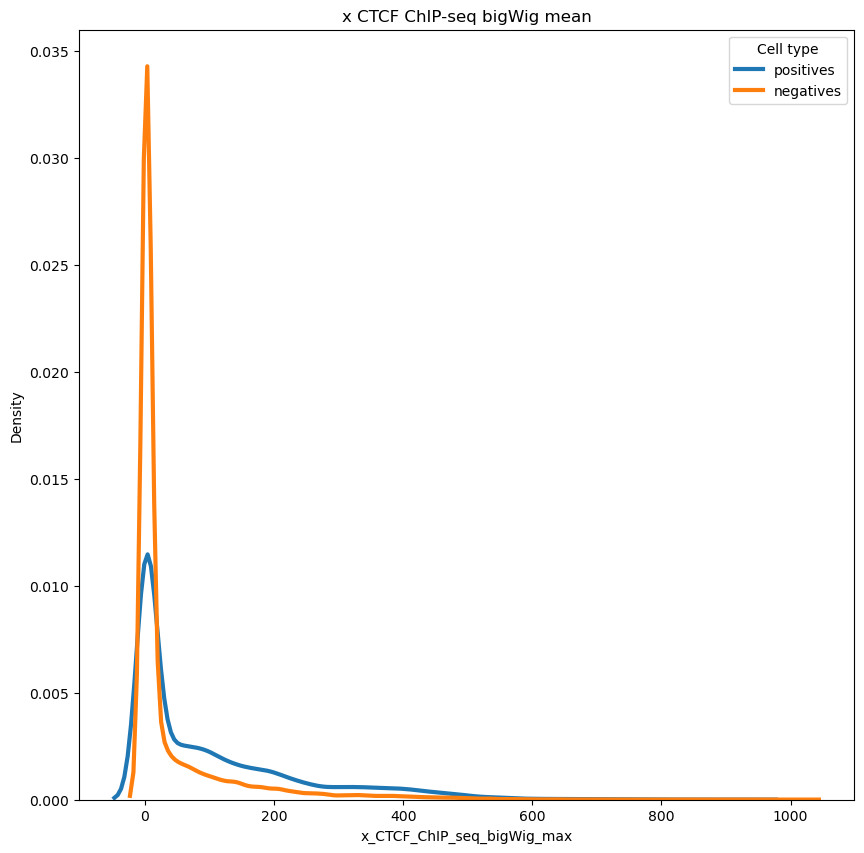

In [3]:
fig = plt.figure(figsize=(10, 10))

# Iterate through the five airlines
sns.distplot(all_cells.loc[all_cells['label']==1,'x_CTCF_ChIP_seq_bigWig_max'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'positives')


sns.distplot(all_cells.loc[all_cells['label']==0,'x_CTCF_ChIP_seq_bigWig_max'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'negatives')
#axs[0,0].set_xlim(-5, 15)
plt.legend(title = 'Cell type')
#axs[0,0].set_xlim(-5, 15)
plt.title('x CTCF ChIP-seq bigWig mean')

Text(0.5, 1.0, 'x CTCF ChIP-seq bigWig mean')

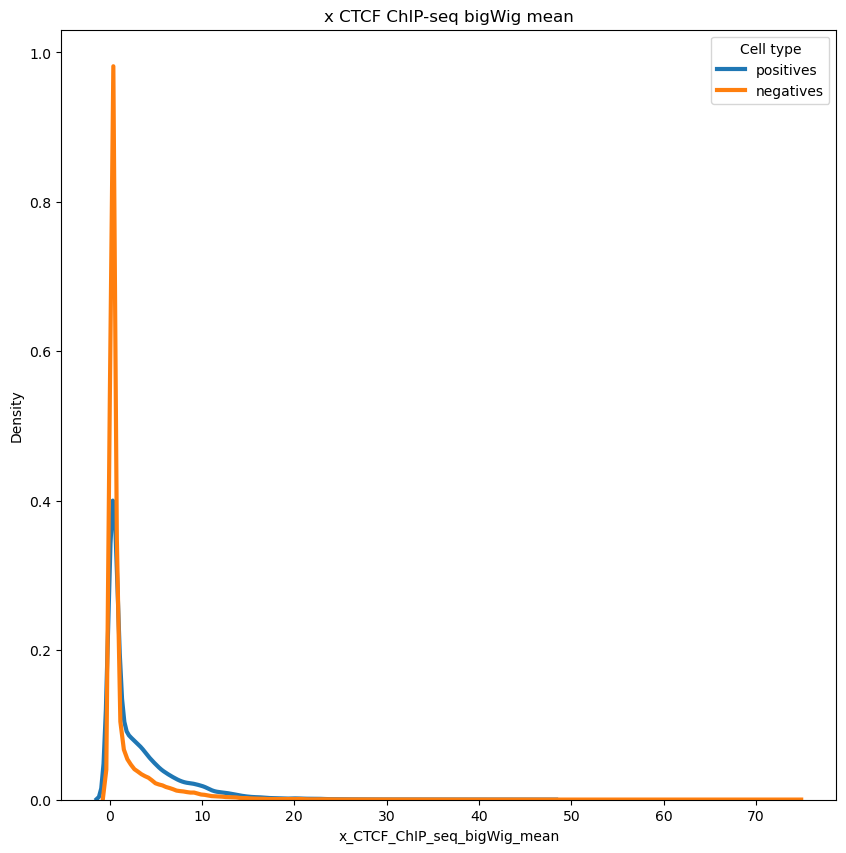

In [4]:
fig = plt.figure(figsize=(10, 10))

# Iterate through the five airlines
sns.distplot(all_cells.loc[all_cells['label']==1,'x_CTCF_ChIP_seq_bigWig_mean'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'positives')


sns.distplot(all_cells.loc[all_cells['label']==0,'x_CTCF_ChIP_seq_bigWig_mean'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'negatives')
#axs[0,0].set_xlim(-5, 15)
plt.legend(title = 'Cell type')
#axs[0,0].set_xlim(-5, 15)
plt.title('x CTCF ChIP-seq bigWig mean')

Text(0.5, 1.0, 'x CTCF ChIP-seq bigWig mean')

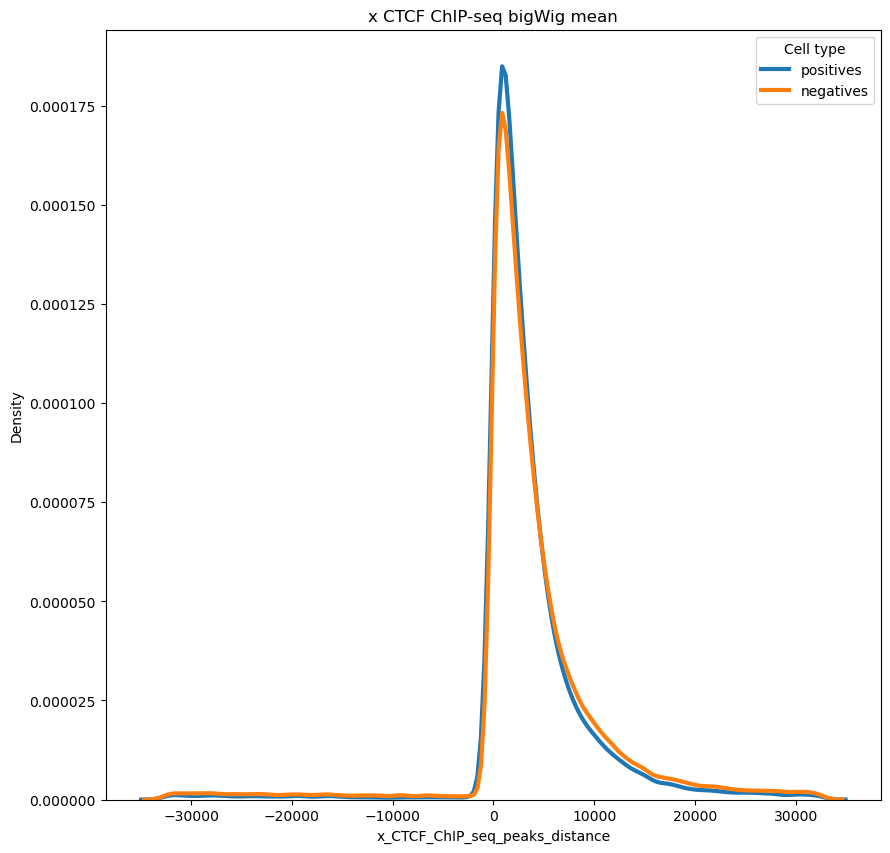

In [6]:
fig = plt.figure(figsize=(10, 10))

# Iterate through the five airlines
sns.distplot(all_cells.loc[all_cells['label']==1,'x_CTCF_ChIP_seq_peaks_distance'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'positives')


sns.distplot(all_cells.loc[all_cells['label']==0,'x_CTCF_ChIP_seq_peaks_distance'], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = 'negatives')
#axs[0,0].set_xlim(-5, 15)
plt.legend(title = 'Cell type')
#axs[0,0].set_xlim(-5, 15)
plt.title('x CTCF ChIP-seq bigWig mean')

In [7]:
all_cells = all_cells.groupby('cell_type')

Generate basic statistics for each cell type

In [8]:
table = prettytable.PrettyTable()
table.field_names = ['Cell type', 'Number of features', 'Number of all samples', 'Number of positive samples', 'Number of negative samples']
cell_types = []
for cell_type, df_cell in all_cells:
    cell_types.append(cell_type)
    df_size = df_cell.shape
    pisitive_num = len(df_cell[df_cell['label'] == 1])
    negative_num = len(df_cell[df_cell['label'] == 0])
    table.add_row([cell_type, df_size[1]-9, df_size[0], pisitive_num, negative_num])
print(table)

+-----------+--------------------+-----------------------+----------------------------+----------------------------+
| Cell type | Number of features | Number of all samples | Number of positive samples | Number of negative samples |
+-----------+--------------------+-----------------------+----------------------------+----------------------------+
|  GM12878  |        3368        |         59456         |            9448            |           50008            |
|    HMEC   |        3368        |         30391         |            5152            |           25239            |
|   HUVEC   |        3368        |         22482         |            3865            |           18617            |
|    HeLa   |        3368        |         18079         |            3094            |           14985            |
|   IMR90   |        3368        |         49379         |            8040            |           41339            |
|    K562   |        3368        |         36412         |      

Compare the distribution of data on chromosomes

In [9]:
chromosomes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
               '21', '22', 'X']

table_chr = prettytable.PrettyTable()
colnames = sorted([f'{cell_type} positives' for cell_type in cell_types] + [f'{cell_type} negatives' for cell_type in cell_types])
table_chr.field_names = ['chr'] + colnames

for chromosome in tqdm(chromosomes):
    row = []
    for cell_type, df_cell in all_cells:
        df_chr = df_cell[df_cell['chr'] == chromosome]
        row.append(len(df_chr[df_chr['label'] == 0]))
        row.append(len(df_chr[df_chr['label'] == 1]))
    table_chr.add_row([chromosome] + row)

print(table_chr)

100%|██████████| 23/23 [00:32<00:00,  1.42s/it]

+-----+-------------------+-------------------+----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+
| chr | GM12878 negatives | GM12878 positives | HMEC negatives | HMEC positives | HUVEC negatives | HUVEC positives | HeLa negatives | HeLa positives | IMR90 negatives | IMR90 positives | K562 negatives | K562 positives | NHEK negatives | NHEK positives |
+-----+-------------------+-------------------+----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+
|  1  |        4834       |        931        |      2569      |      533       |       2014      |       409       |      1565      |      332       |       4174      |       827       |      3478      |      702       |      2114 

In [10]:
print(table_chr)

+-----+-------------------+-------------------+----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+
| chr | GM12878 negatives | GM12878 positives | HMEC negatives | HMEC positives | HUVEC negatives | HUVEC positives | HeLa negatives | HeLa positives | IMR90 negatives | IMR90 positives | K562 negatives | K562 positives | NHEK negatives | NHEK positives |
+-----+-------------------+-------------------+----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+
|  1  |        4834       |        931        |      2569      |      533       |       2014      |       409       |      1565      |      332       |       4174      |       827       |      3478      |      702       |      2114 

CTCF ChIP-seq distributions

In [5]:
def create_distplot(statistic: str, experiment: str, xlim: tuple = None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # Iterate through the five airlines
    for cell_type, df_cell in all_cells:
        sns.distplot(df_cell.loc[df_cell['label']==1, f'x_{experiment}_{statistic}'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = cell_type,
                    ax=axs[0, 0])
        axs[0,0].legend(title = 'Cell type')
        if xlim:
            axs[0,0].set_xlim(xlim)
        axs[0,0].set_title(f'x {experiment} {statistic}\nfor positive samples')

        sns.distplot(df_cell.loc[df_cell['label']==0, f'x_{experiment}_{statistic}'], hist = False, kde = True,
                        kde_kws = {'linewidth': 3},
                        label = cell_type,
                        ax=axs[0, 1])
        axs[0,1].legend(title = 'Cell type')
        if xlim:
            axs[0,1].set_xlim(xlim)
        axs[0,1].set_title(f'x {experiment} {statistic}\nfor negative samples')

        sns.distplot(df_cell.loc[df_cell['label']==1, f'y_{experiment}_{statistic}'], hist = False, kde = True,
                        kde_kws = {'linewidth': 3},
                        label = cell_type,
                        ax=axs[1, 0])
        axs[1,0].legend(title = 'Cell type')
        if xlim:
            axs[1,0].set_xlim(xlim)
        axs[1,0].set_title(f'y {experiment} {statistic}\nfor positive samples')

        sns.distplot(df_cell.loc[df_cell['label']==0, f'y_{experiment}_{statistic}'], hist = False, kde = True,
                        kde_kws = {'linewidth': 3},
                        label = cell_type,
                        ax=axs[1, 1])
        axs[1,1].legend(title = 'Cell type')
        if xlim:
            axs[1,1].set_xlim(xlim)
        axs[1,1].set_title(f'y {experiment} {statistic}\nfor negative samples')
    # tight layout
    plt.tight_layout()

ValueError: too many values to unpack (expected 2)

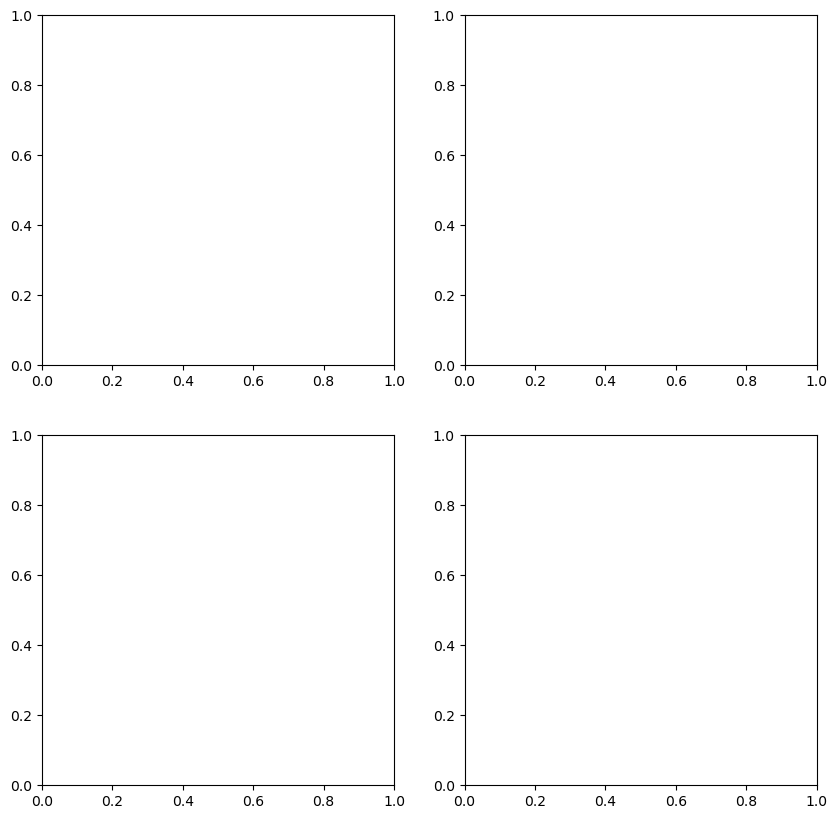

In [6]:
create_distplot('mean', 'CTCF_ChIP_seq_bigWig', (-5, 20))

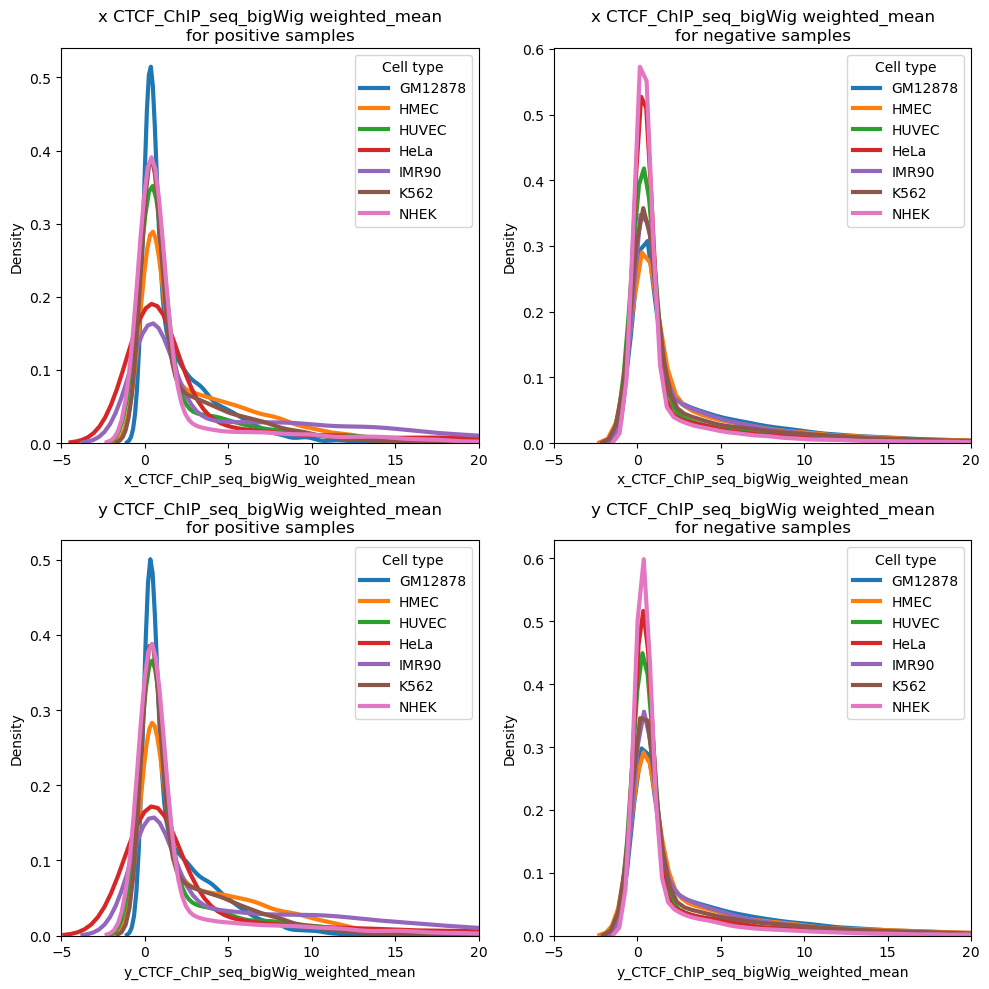

In [29]:
create_distplot('weighted_mean', 'CTCF_ChIP_seq_bigWig', (-5, 20))

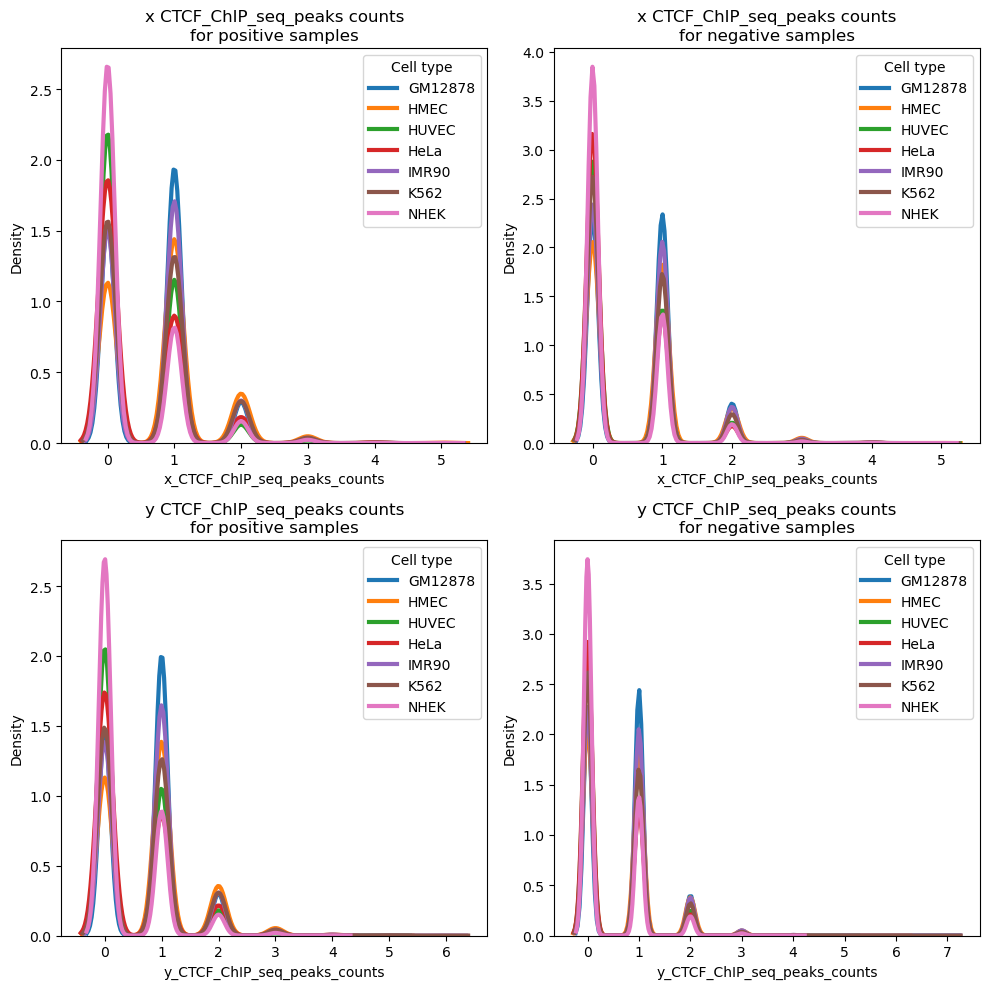

In [30]:
create_distplot('counts', 'CTCF_ChIP_seq_peaks')

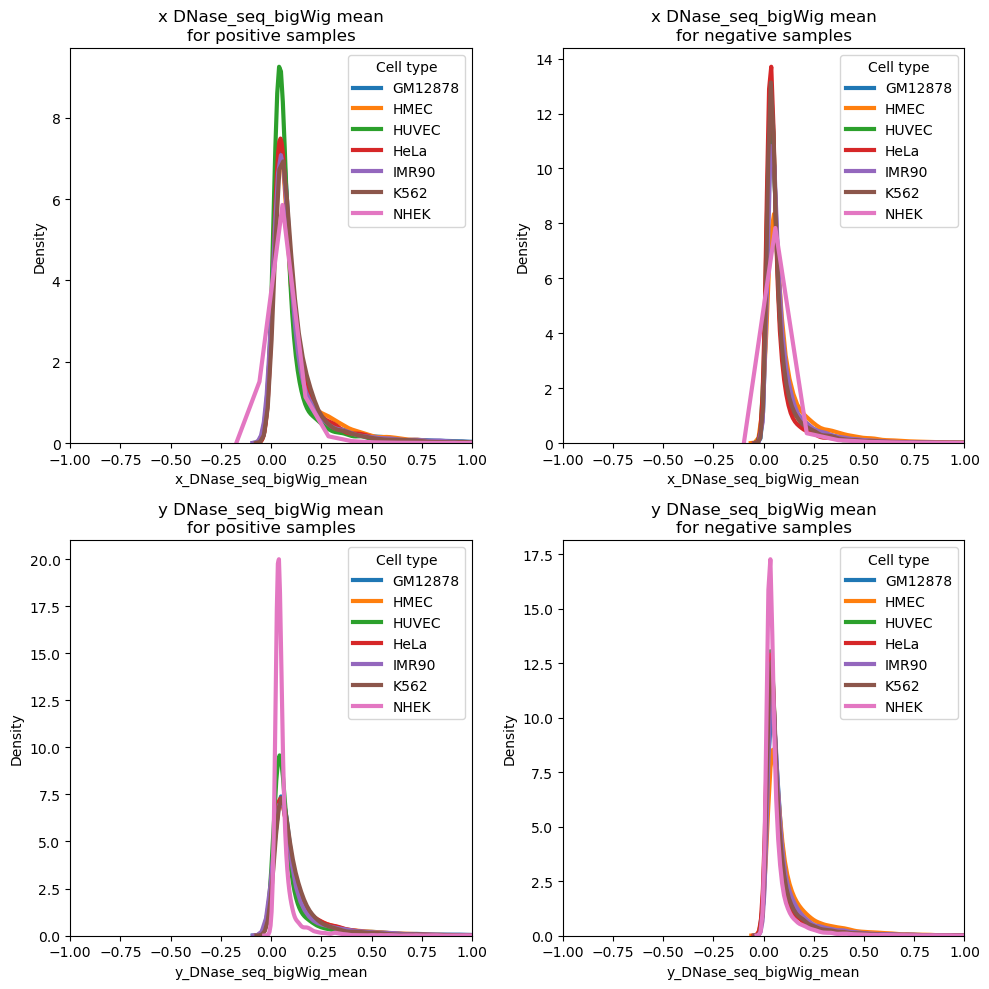

In [32]:
create_distplot('mean', 'DNase_seq_bigWig', (-1, 1))

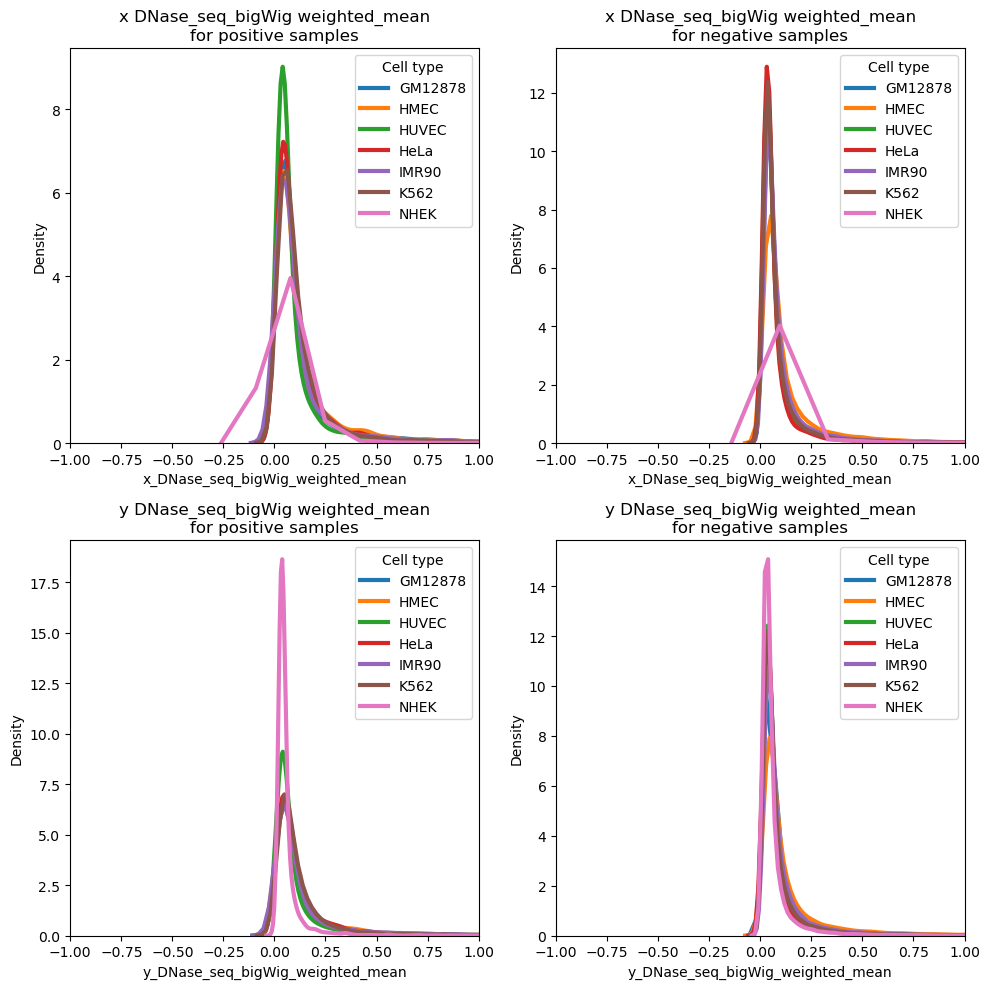

: 

In [33]:
create_distplot('weighted_mean', 'DNase_seq_bigWig', (-1, 1))

Correlation

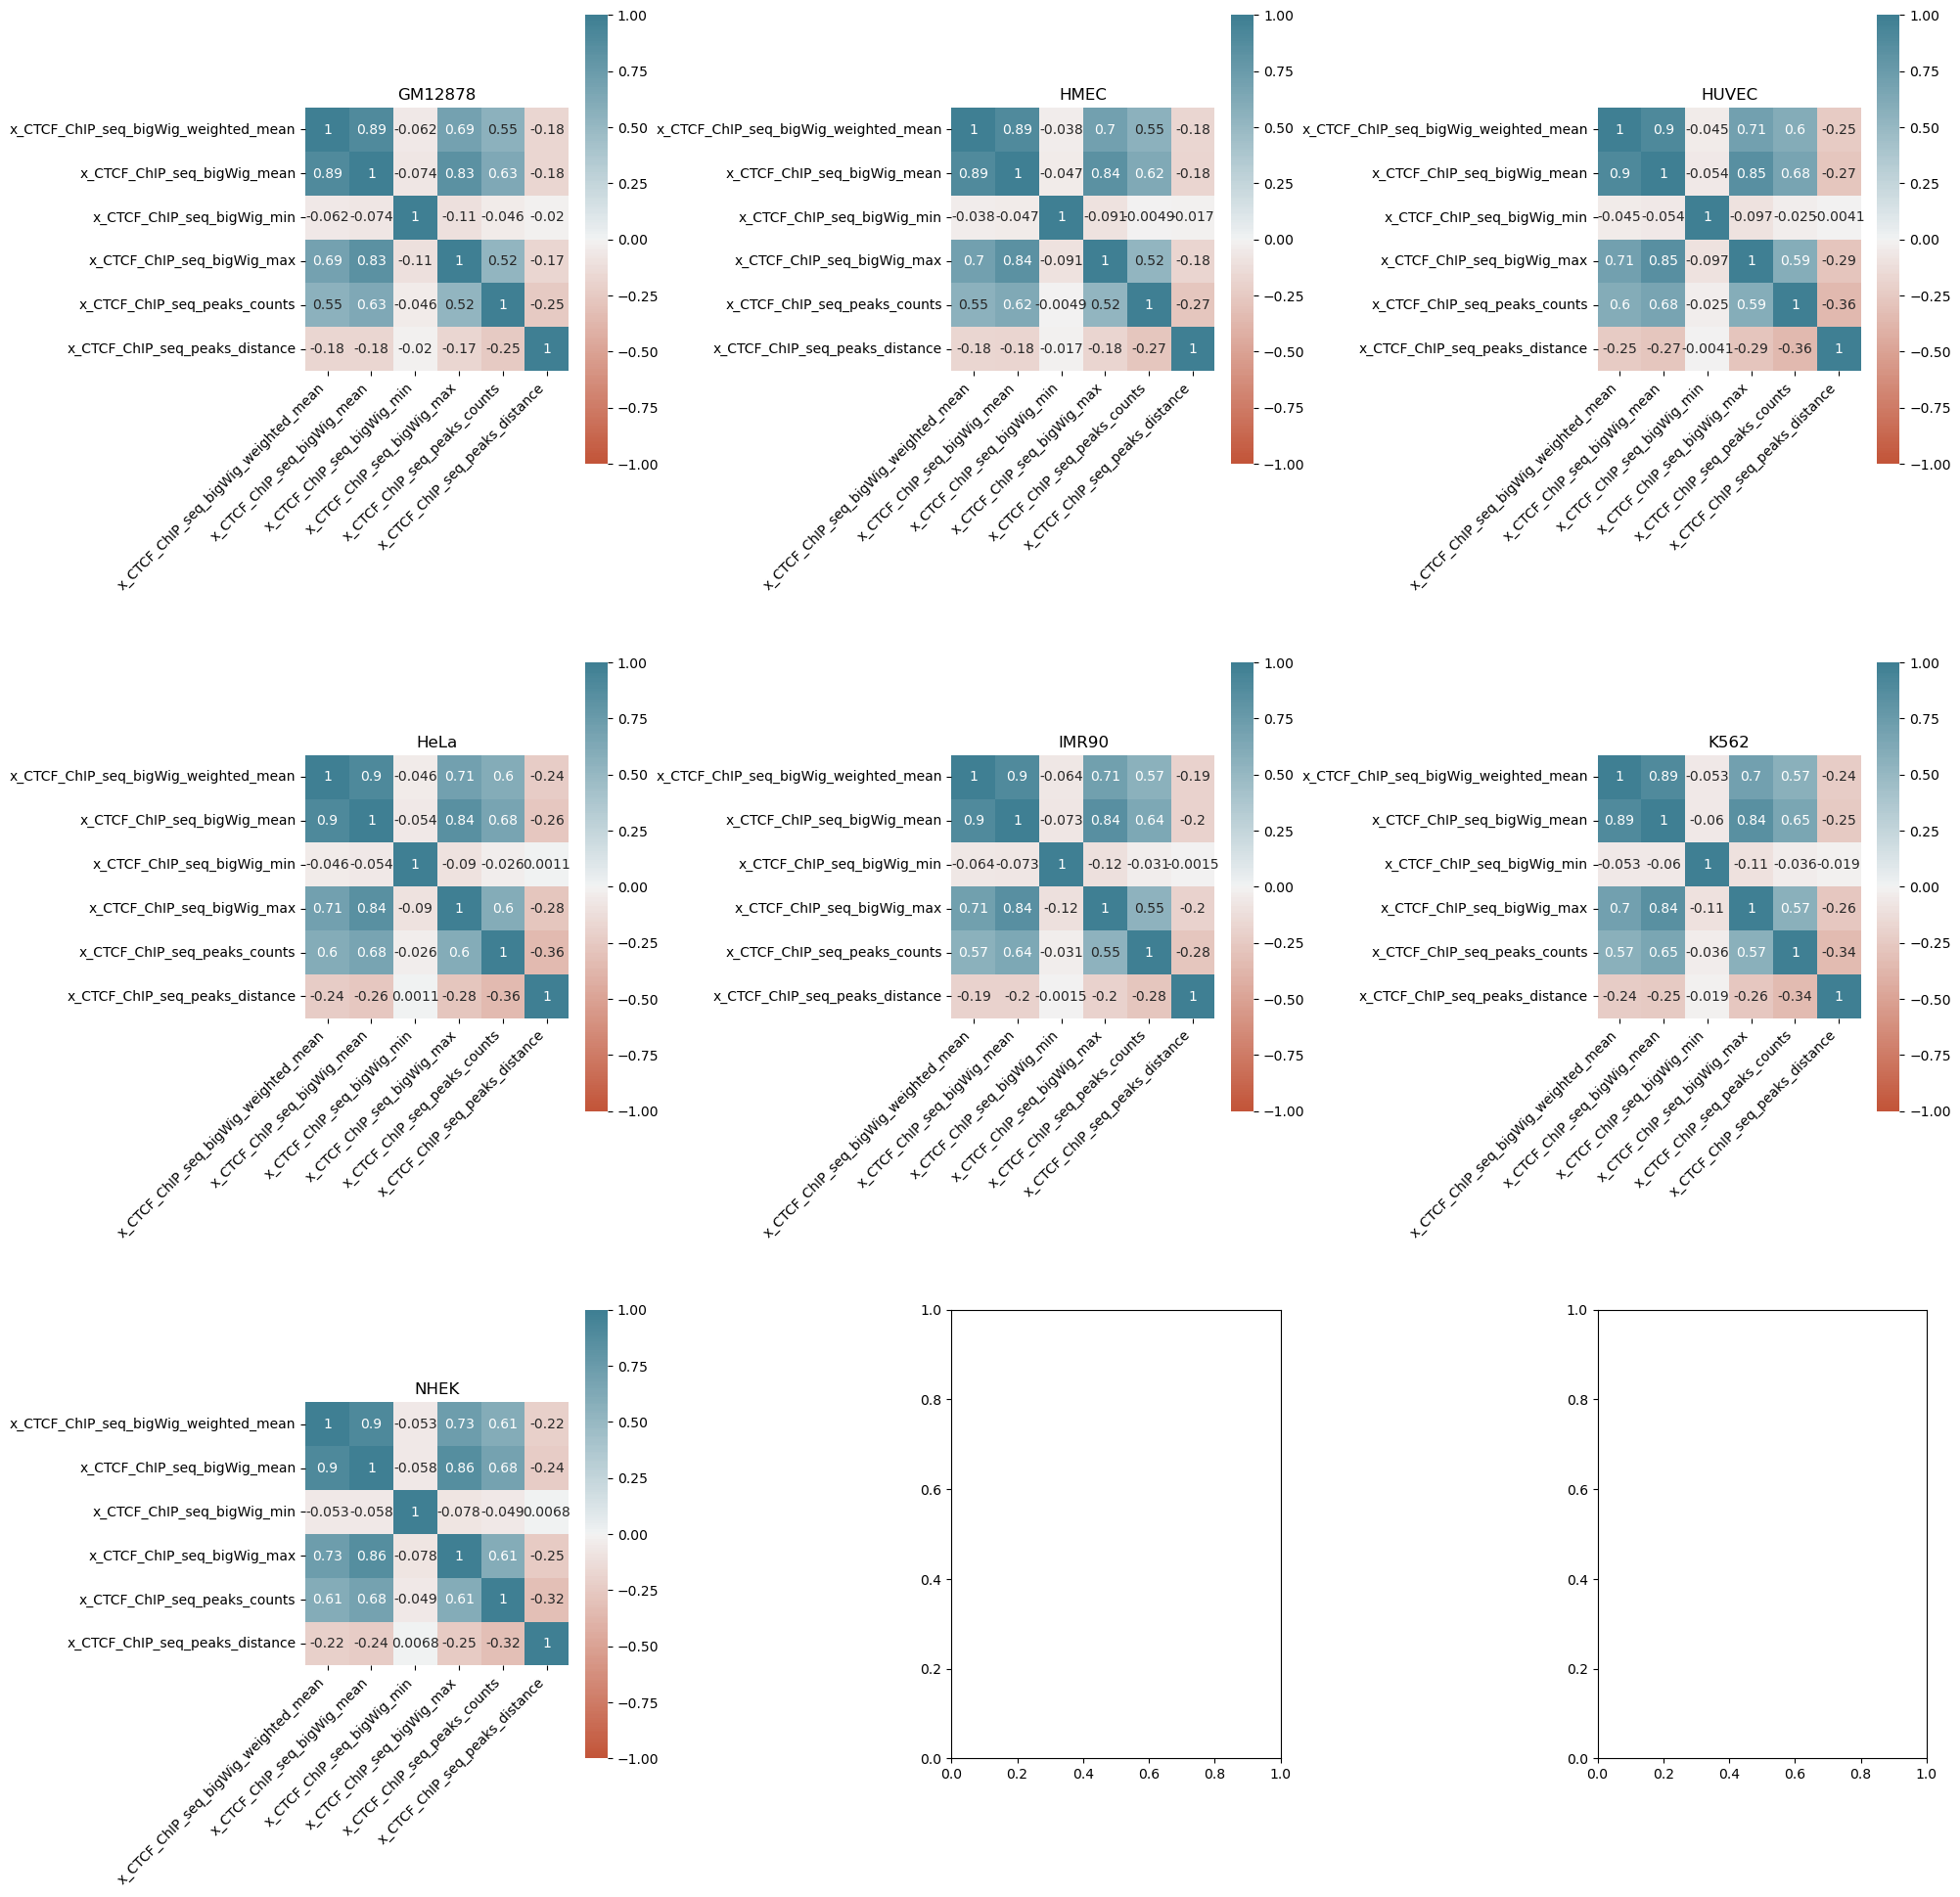

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

i = 0
j = 0
# Iterate through the seven cell types
for cell_type, df_cell in all_cells:
    corr = df_cell[['x_CTCF_ChIP_seq_bigWig_weighted_mean', 'x_CTCF_ChIP_seq_bigWig_mean', 'x_CTCF_ChIP_seq_bigWig_min', 'x_CTCF_ChIP_seq_bigWig_max', 'x_CTCF_ChIP_seq_peaks_counts', 'x_CTCF_ChIP_seq_peaks_distance']].corr()
    sns.heatmap(corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        ax = axs[i, j],
        annot=True
    )
    axs[i, j].set_xticklabels(
        axs[i, j].get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    axs[i, j].set_title(cell_type)
    j += 1
    if j == 3:
        j = 0
        i += 1

fig.tight_layout()